In [1]:
!pip install tqdm -q
#

In [2]:
!pip install folium

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

In [5]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

# C:\Windows\Fonts   # ==> OS에 등록되어 있는 모든 폰트 파일들
font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF' # 윈도우 OS 폰트 경로

font_prop = fm.FontProperties(fname = font_path) # 폰트경로에 있는 폰트 이름들 뽑아오자.


font_name = font_prop.get_name() # 폰트명

#matplotlib.rc('font', key=value)
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False) # matplotlib의 기본적인 유니코드 minus폰트사용 중지

[ Dataset Info. ]
train.csv [파일] :
item_id : 무역품 식별 ID
year : 년
month : 월
seq : 동일 년-월 내 일련번호
type : 유형 구분 코드
hs4 : HS4 코드
weight : 중량
quantity : 수량
value : 무역량 (정수형)


sample_submission.csv [파일] - 제출 양식
leading_item_id : 선행 무역품 식별 ID
following_item_id : 후행 무역품 식별 ID
value : 2025년 8월의 후행 무역품에 예측된 총 무역량 (정수형)

In [6]:
train = pd.read_csv('../train.csv')
train.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '../train.csv'

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   10836 non-null  object 
 1   year      10836 non-null  int64  
 2   month     10836 non-null  int64  
 3   seq       10836 non-null  float64
 4   type      10836 non-null  int64  
 5   hs4       10836 non-null  int64  
 6   weight    10836 non-null  float64
 7   quantity  10836 non-null  float64
 8   value     10836 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 762.0+ KB


In [ ]:
train.describe()

year         month           seq     type           hs4  \
count  10836.000000  10836.000000  10836.000000  10836.0  10836.000000   
mean    2023.331395      6.108435      2.034238      1.0   4821.969546   
std        1.049357      3.392649      0.813380      0.0   2296.892536   
min     2022.000000      1.000000      1.000000      1.0   1210.000000   
25%     2022.000000      3.000000      1.000000      1.0   2833.000000   
50%     2023.000000      6.000000      2.000000      1.0   3824.000000   
75%     2024.000000      9.000000      3.000000      1.0   7202.000000   
max     2025.000000     12.000000      3.000000      1.0   9403.000000   

             weight      quantity         value  
count  1.083600e+04  1.083600e+04  1.083600e+04  
mean   1.098413e+06  8.633771e+04  1.739442e+06  
std    5.153790e+06  7.614669e+06  5.457480e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    3.457500e+02  0.000000e+00  1.150675e+04  
50%    6.532500e+03  0.000000e+00  1.250070e+05  
75%    1.555108e+05  0.000000e+00  1.039764e+06  
max    1.104919e+08  7.925990e+08  1.110414e+08

In [ ]:
print(f'train.shape = {train.shape}')
display(train.apply(lambda x: len(np.unique(x)), axis=0))
display(train.apply(lambda x: np.unique(x), axis=0))

train.shape = (10836, 9)


item_id      100
year           4
month         12
seq            3
type           1
hs4           71
weight      7438
quantity    1226
value       9686
dtype: int64

item_id     [AANGBULD, AHMDUILJ, ANWUJOKX, APQGTRMF, ATLDM...
year                                 [2022, 2023, 2024, 2025]
month                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
seq                                           [1.0, 2.0, 3.0]
type                                                      [1]
hs4         [1210, 2002, 2102, 2501, 2529, 2612, 2701, 271...
weight      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
quantity    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
value       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
dtype: object

In [ ]:
train.max()

item_id        ZXERAXWP
year               2025
month                12
seq                 3.0
type                  1
hs4                9403
weight      110491899.0
quantity    792598955.0
value       111041383.0
dtype: object

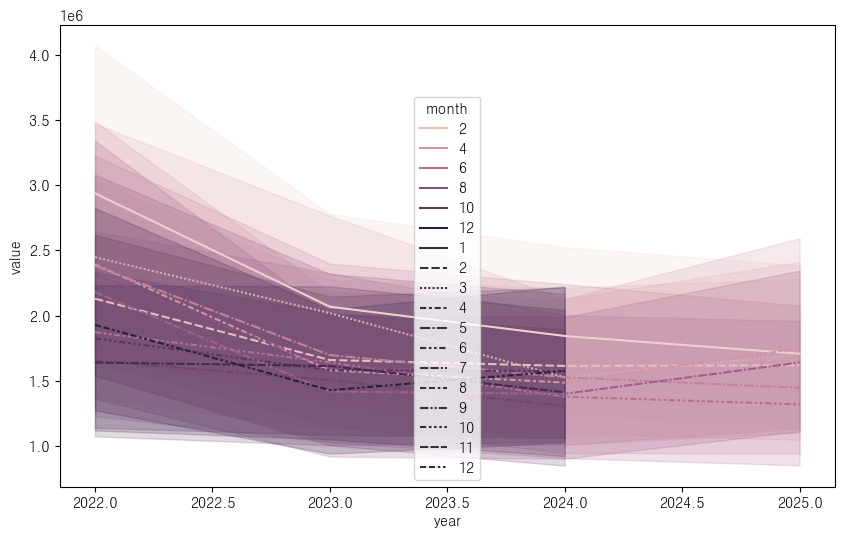

In [ ]:
# 4년간 년도에 따라서 value가 어떻게 변했는지

fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
sns.lineplot(data=train, x='year', y='value',
             hue='month', style='month')
plt.show()



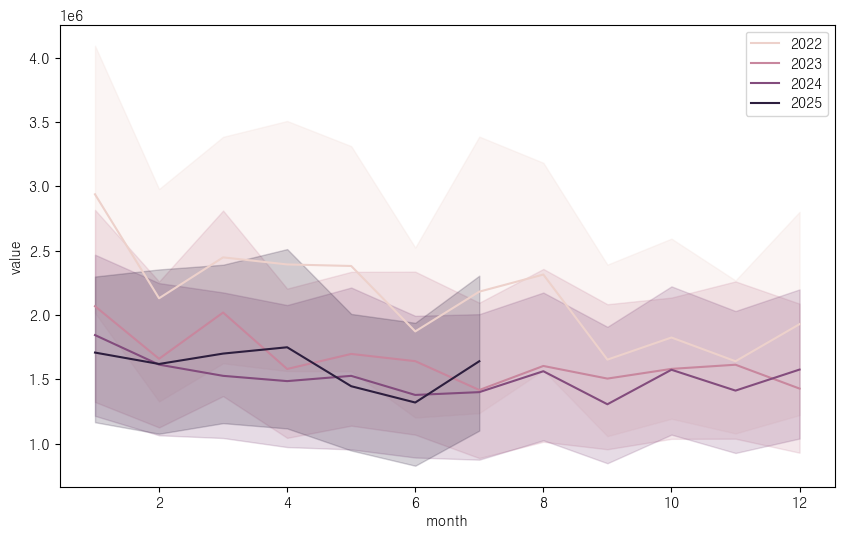

In [ ]:
# 4년간 월에 따라서 value가 어떻게 변했는지

fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
sns.lineplot(data=train, x='month', y='value',
            hue='year')
plt.legend()
plt.show()

In [ ]:
train = pd.read_csv('../train.csv')

# year, month, item_id 기준으로 value 합산 (seq만 다르다면 value 합산)
monthly = (
    train
    .groupby(["item_id", "year", "month"], as_index=False)["value"]
    .sum()
)

# year, month를 하나의 키(ym)로 묶기
monthly["ym"] = pd.to_datetime(
    monthly["year"].astype(str) + "-" + monthly["month"].astype(str).str.zfill(2)
)

# item_id × ym 피벗 (월별 총 무역량 매트릭스 생성)
pivot = (
    monthly
    .pivot(index="item_id", columns="ym", values="value")
    .fillna(0.0)
)

pivot.head()

ym         2022-01-01   2022-02-01   2022-03-01   2022-04-01   2022-05-01  \
item_id                                                                     
AANGBULD      14276.0      52347.0      53549.0          0.0      26997.0   
AHMDUILJ     242705.0     120847.0     197317.0     126142.0      71730.0   
ANWUJOKX          0.0          0.0          0.0      63580.0      81670.0   
APQGTRMF     383999.0     512813.0     217064.0     470398.0     539873.0   
ATLDMDBO  143097177.0  103568323.0  118403737.0  121873741.0  115024617.0   

ym        2022-06-01   2022-07-01  2022-08-01  2022-09-01  2022-10-01  ...  \
item_id                                                                ...   
AANGBULD     84489.0          0.0         0.0         0.0         0.0  ...   
AHMDUILJ    149138.0     186617.0    169995.0    140547.0     89292.0  ...   
ANWUJOKX     26424.0       8470.0         0.0         0.0     80475.0  ...   
APQGTRMF    582317.0     759980.0    216019.0    537693.0    205326.0  ...   
ATLDMDBO  65716075.0  146216818.0  97552978.0  72341427.0  87454167.0  ...   

ym        2024-10-01  2024-11-01  2024-12-01  2025-01-01  2025-02-01  \
item_id                                                                
AANGBULD    428725.0    144248.0     26507.0     25691.0     25805.0   
AHMDUILJ    123085.0    143451.0     78649.0    125098.0     80404.0   
ANWUJOKX         0.0         0.0         0.0     27980.0         0.0   
APQGTRMF    683581.0      2147.0         0.0     25013.0        77.0   
ATLDMDBO  60276050.0  30160198.0  42613728.0  64451013.0  38667429.0   

ym        2025-03-01  2025-04-01  2025-05-01  2025-06-01  2025-07-01  
item_id                                                               
AANGBULD         0.0     38441.0         0.0    441275.0    533478.0  
AHMDUILJ    157401.0    115509.0    127473.0     89479.0    101317.0  
ANWUJOKX         0.0         0.0         0.0         0.0         0.0  
APQGTRMF     20741.0      2403.0      3543.0     32430.0     40608.0  
ATLDMDBO  29354408.0  42450439.0  37136720.0  32181798.0  57090235.0  

[5 rows x 43 columns]

In [ ]:
plt.bar(train["month"], train["value"], color='g')

plt.title("월별 values")
plt.xlabel("월")
plt.ylabel("value")

# enumerate에서 value 한 개씩 꺼내기
for i, v in enumerate(train["value"]):
    plt.text(i, v, str(v), fontsize=8, ha='center')

plt.show()


In [ ]:
def safe_corr(x, y):
    if np.std(x) == 0 or np.std(y) == 0:
        return 0.0
    return float(np.corrcoef(x, y)[0, 1])

def find_comovement_pairs(pivot, max_lag=6, min_nonzero=12, corr_threshold=0.4):
    items = pivot.index.to_list()
    months = pivot.columns.to_list()
    n_months = len(months)

    results = []

    for i, leader in tqdm(enumerate(items)):
        x = pivot.loc[leader].values.astype(float)
        if np.count_nonzero(x) < min_nonzero:
            continue

        for follower in items:
            if follower == leader:
                continue

            y = pivot.loc[follower].values.astype(float)
            if np.count_nonzero(y) < min_nonzero:
                continue

            best_lag = None
            best_corr = 0.0

            # lag = 1 ~ max_lag 탐색
            for lag in range(1, max_lag + 1):
                if n_months <= lag:
                    continue
                corr = safe_corr(x[:-lag], y[lag:])
                if abs(corr) > abs(best_corr):
                    best_corr = corr
                    best_lag = lag

            # 임계값 이상이면 공행성쌍으로 채택
            if best_lag is not None and abs(best_corr) >= corr_threshold:
                results.append({
                    "leading_item_id": leader,
                    "following_item_id": follower,
                    "best_lag": best_lag,
                    "max_corr": best_corr,
                })

    pairs = pd.DataFrame(results)
    return pairs

pairs = find_comovement_pairs(pivot)
print("탐색된 공행성쌍 수:", len(pairs))
pairs.head()

0it [00:00, ?it/s]

100it [00:07, 13.57it/s]

탐색된 공행성쌍 수: 1425


leading_item_id following_item_id  best_lag  max_corr
0        AANGBULD          APQGTRMF         5 -0.443984
1        AANGBULD          DEWLVASR         6  0.640221
2        AANGBULD          DNMPSKTB         4 -0.410635
3        AANGBULD          EVBVXETX         6  0.436623
4        AANGBULD          FTSVTTSR         3  0.531400

In [ ]:
strong_pairs = pairs[pairs['max_corr'].abs()>= 0.6]
print("의미있는 쌍 개수:", len(strong_pairs))
strong_pairs.head()

의미있는 쌍 개수: 196


leading_item_id following_item_id  best_lag  max_corr
1         AANGBULD          DEWLVASR         6  0.640221
57        ATLDMDBO          BTMOEMEP         1  0.664574
60        ATLDMDBO          DNMPSKTB         6  0.677985
62        ATLDMDBO          GYHKIVQT         6  0.671399
63        ATLDMDBO          HXYSSRXE         4  0.604769

In [ ]:
strong_pairs = pairs[pairs['max_corr'].abs() <= 0.6]
print("의미없는 쌍 개수:", len(strong_pairs))
strong_pairs.head()

의미없는 쌍 개수: 1229


leading_item_id following_item_id  best_lag  max_corr
0        AANGBULD          APQGTRMF         5 -0.443984
2        AANGBULD          DNMPSKTB         4 -0.410635
3        AANGBULD          EVBVXETX         6  0.436623
4        AANGBULD          FTSVTTSR         3  0.531400
5        AANGBULD          GKQIJYDH         6  0.582501

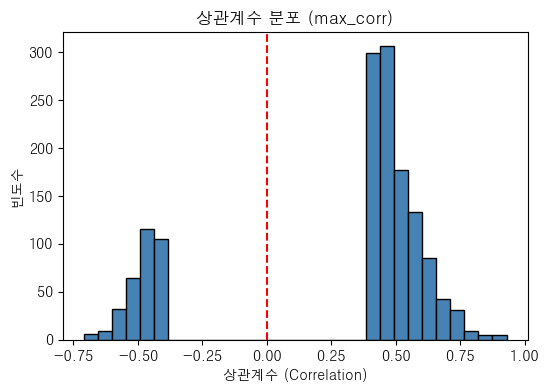

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(pairs["max_corr"], bins=30, color='steelblue', edgecolor='black')
plt.title("상관계수 분포 (max_corr)")
plt.xlabel("상관계수 (Correlation)")
plt.ylabel("빈도수")
plt.axvline(0, color='red', linestyle='--')
plt.show()

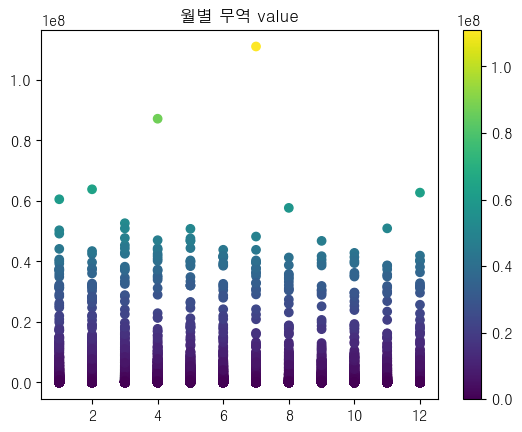

In [ ]:
plt.scatter(train['month'], train["value"],
            c=train['value'])

plt.title("월별 무역 value")
plt.colorbar()
plt.show()

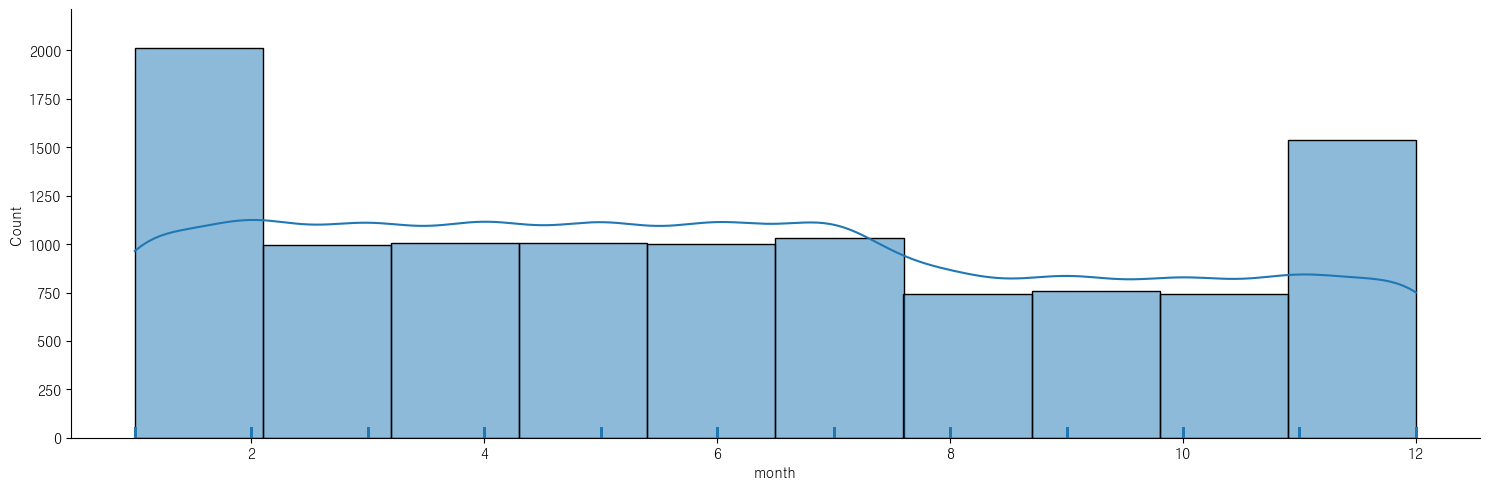

In [ ]:
# 월별 무역 횟수
sns.displot(train["month"], bins=10, height=5,
            aspect=3, rug=True, kde=True)
plt.show()

In [ ]:
corr = train[['weight','value', 'month', 'year', 'hs4']].corr(method = 'pearson')
corr

weight     value     month      year       hs4
weight  1.000000  0.670956 -0.017376 -0.003075 -0.117811
value   0.670956  1.000000 -0.023048 -0.038326 -0.016254
month  -0.017376 -0.023048  1.000000 -0.191825 -0.002182
year   -0.003075 -0.038326 -0.191825  1.000000  0.016171
hs4    -0.117811 -0.016254 -0.002182  0.016171  1.000000

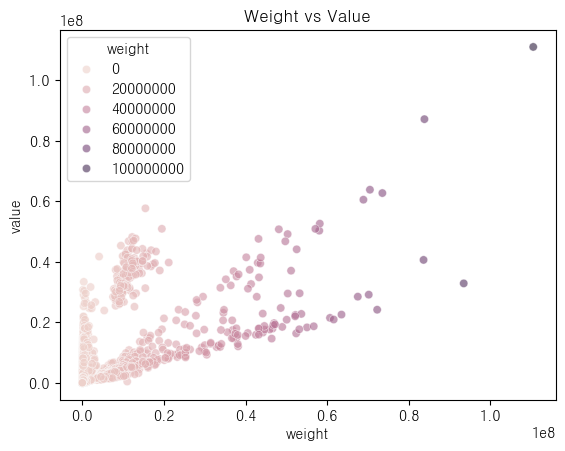

In [ ]:
sns.scatterplot(data=train, x='weight', y='value', alpha=0.6, hue='weight')
plt.title("Weight vs Value")
plt.show()

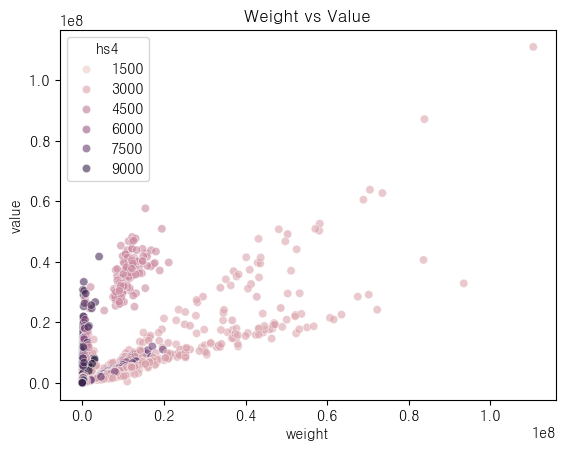

In [ ]:
sns.scatterplot(data=train, x='weight', y='value', alpha=0.6, hue='hs4')
plt.title("Weight vs Value")
plt.show()

In [ ]:
corr = train[['month', 'value']].corr(method = 'pearson')
corr

month     value
month  1.000000 -0.023048
value -0.023048  1.000000

In [ ]:
corr_mat = train.corr(numeric_only=True)
corr_mat

year     month       seq  type       hs4    weight  quantity  \
year      1.000000 -0.191825 -0.001184   NaN  0.016171 -0.003075 -0.003065   
month    -0.191825  1.000000 -0.000509   NaN -0.002182 -0.017376  0.004954   
seq      -0.001184 -0.000509  1.000000   NaN -0.000828  0.009250 -0.012258   
type           NaN       NaN       NaN   NaN       NaN       NaN       NaN   
hs4       0.016171 -0.002182 -0.000828   NaN  1.000000 -0.117811 -0.001656   
weight   -0.003075 -0.017376  0.009250   NaN -0.117811  1.000000 -0.002299   
quantity -0.003065  0.004954 -0.012258   NaN -0.001656 -0.002299  1.000000   
value    -0.038326 -0.023048 -0.000357   NaN -0.016254  0.670956 -0.000050   

             value  
year     -0.038326  
month    -0.023048  
seq      -0.000357  
type           NaN  
hs4      -0.016254  
weight    0.670956  
quantity -0.000050  
value     1.000000

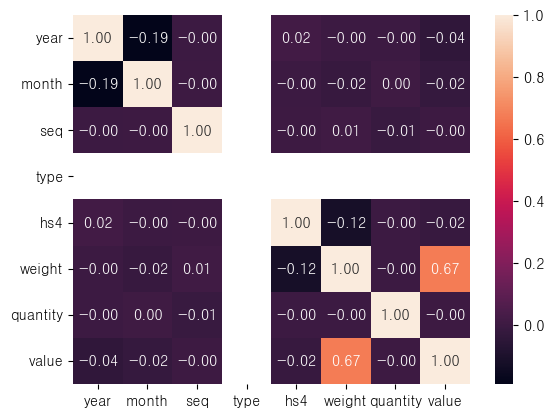

In [ ]:
sns.heatmap(corr_mat, annot=True, fmt='.2f')

plt.show()

In [ ]:
pivot = (
    monthly
    .pivot(index="item_id", columns="ym", values="value")
    .fillna(0.0)
)

pivot.head()

ym         2022-01-01   2022-02-01   2022-03-01   2022-04-01   2022-05-01  \
item_id                                                                     
AANGBULD      14276.0      52347.0      53549.0          0.0      26997.0   
AHMDUILJ     242705.0     120847.0     197317.0     126142.0      71730.0   
ANWUJOKX          0.0          0.0          0.0      63580.0      81670.0   
APQGTRMF     383999.0     512813.0     217064.0     470398.0     539873.0   
ATLDMDBO  143097177.0  103568323.0  118403737.0  121873741.0  115024617.0   

ym        2022-06-01   2022-07-01  2022-08-01  2022-09-01  2022-10-01  ...  \
item_id                                                                ...   
AANGBULD     84489.0          0.0         0.0         0.0         0.0  ...   
AHMDUILJ    149138.0     186617.0    169995.0    140547.0     89292.0  ...   
ANWUJOKX     26424.0       8470.0         0.0         0.0     80475.0  ...   
APQGTRMF    582317.0     759980.0    216019.0    537693.0    205326.0  ...   
ATLDMDBO  65716075.0  146216818.0  97552978.0  72341427.0  87454167.0  ...   

ym        2024-10-01  2024-11-01  2024-12-01  2025-01-01  2025-02-01  \
item_id                                                                
AANGBULD    428725.0    144248.0     26507.0     25691.0     25805.0   
AHMDUILJ    123085.0    143451.0     78649.0    125098.0     80404.0   
ANWUJOKX         0.0         0.0         0.0     27980.0         0.0   
APQGTRMF    683581.0      2147.0         0.0     25013.0        77.0   
ATLDMDBO  60276050.0  30160198.0  42613728.0  64451013.0  38667429.0   

ym        2025-03-01  2025-04-01  2025-05-01  2025-06-01  2025-07-01  
item_id                                                               
AANGBULD         0.0     38441.0         0.0    441275.0    533478.0  
AHMDUILJ    157401.0    115509.0    127473.0     89479.0    101317.0  
ANWUJOKX         0.0         0.0         0.0         0.0         0.0  
APQGTRMF     20741.0      2403.0      3543.0     32430.0     40608.0  
ATLDMDBO  29354408.0  42450439.0  37136720.0  32181798.0  57090235.0  

[5 rows x 43 columns]

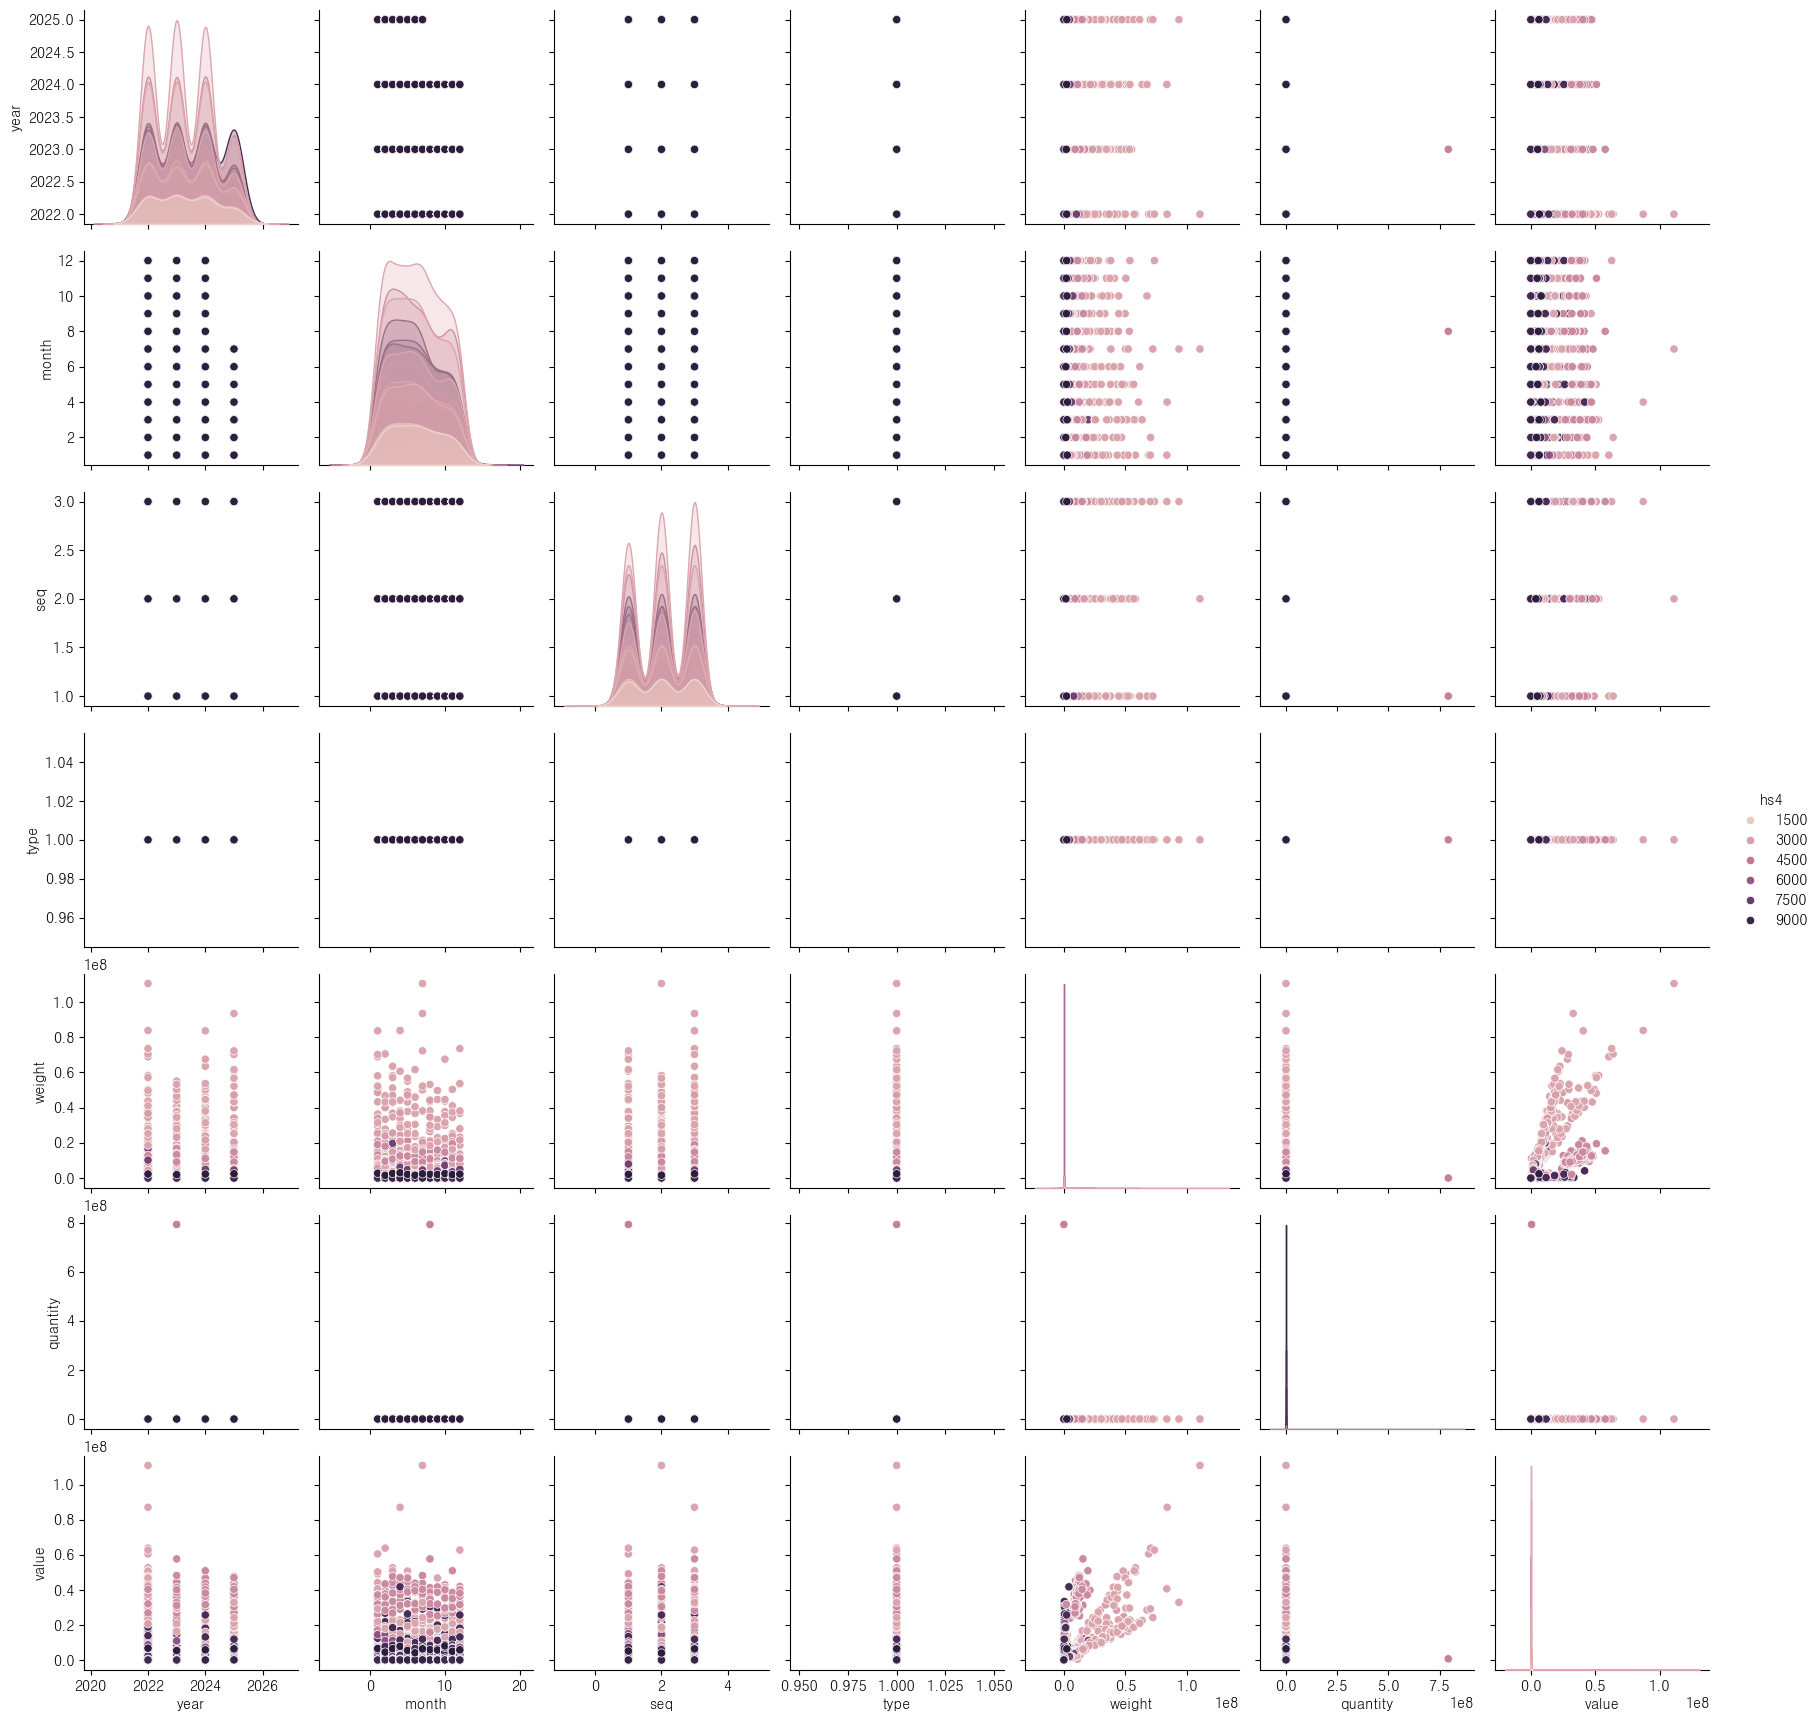

In [ ]:
sns.pairplot(train, hue="hs4")

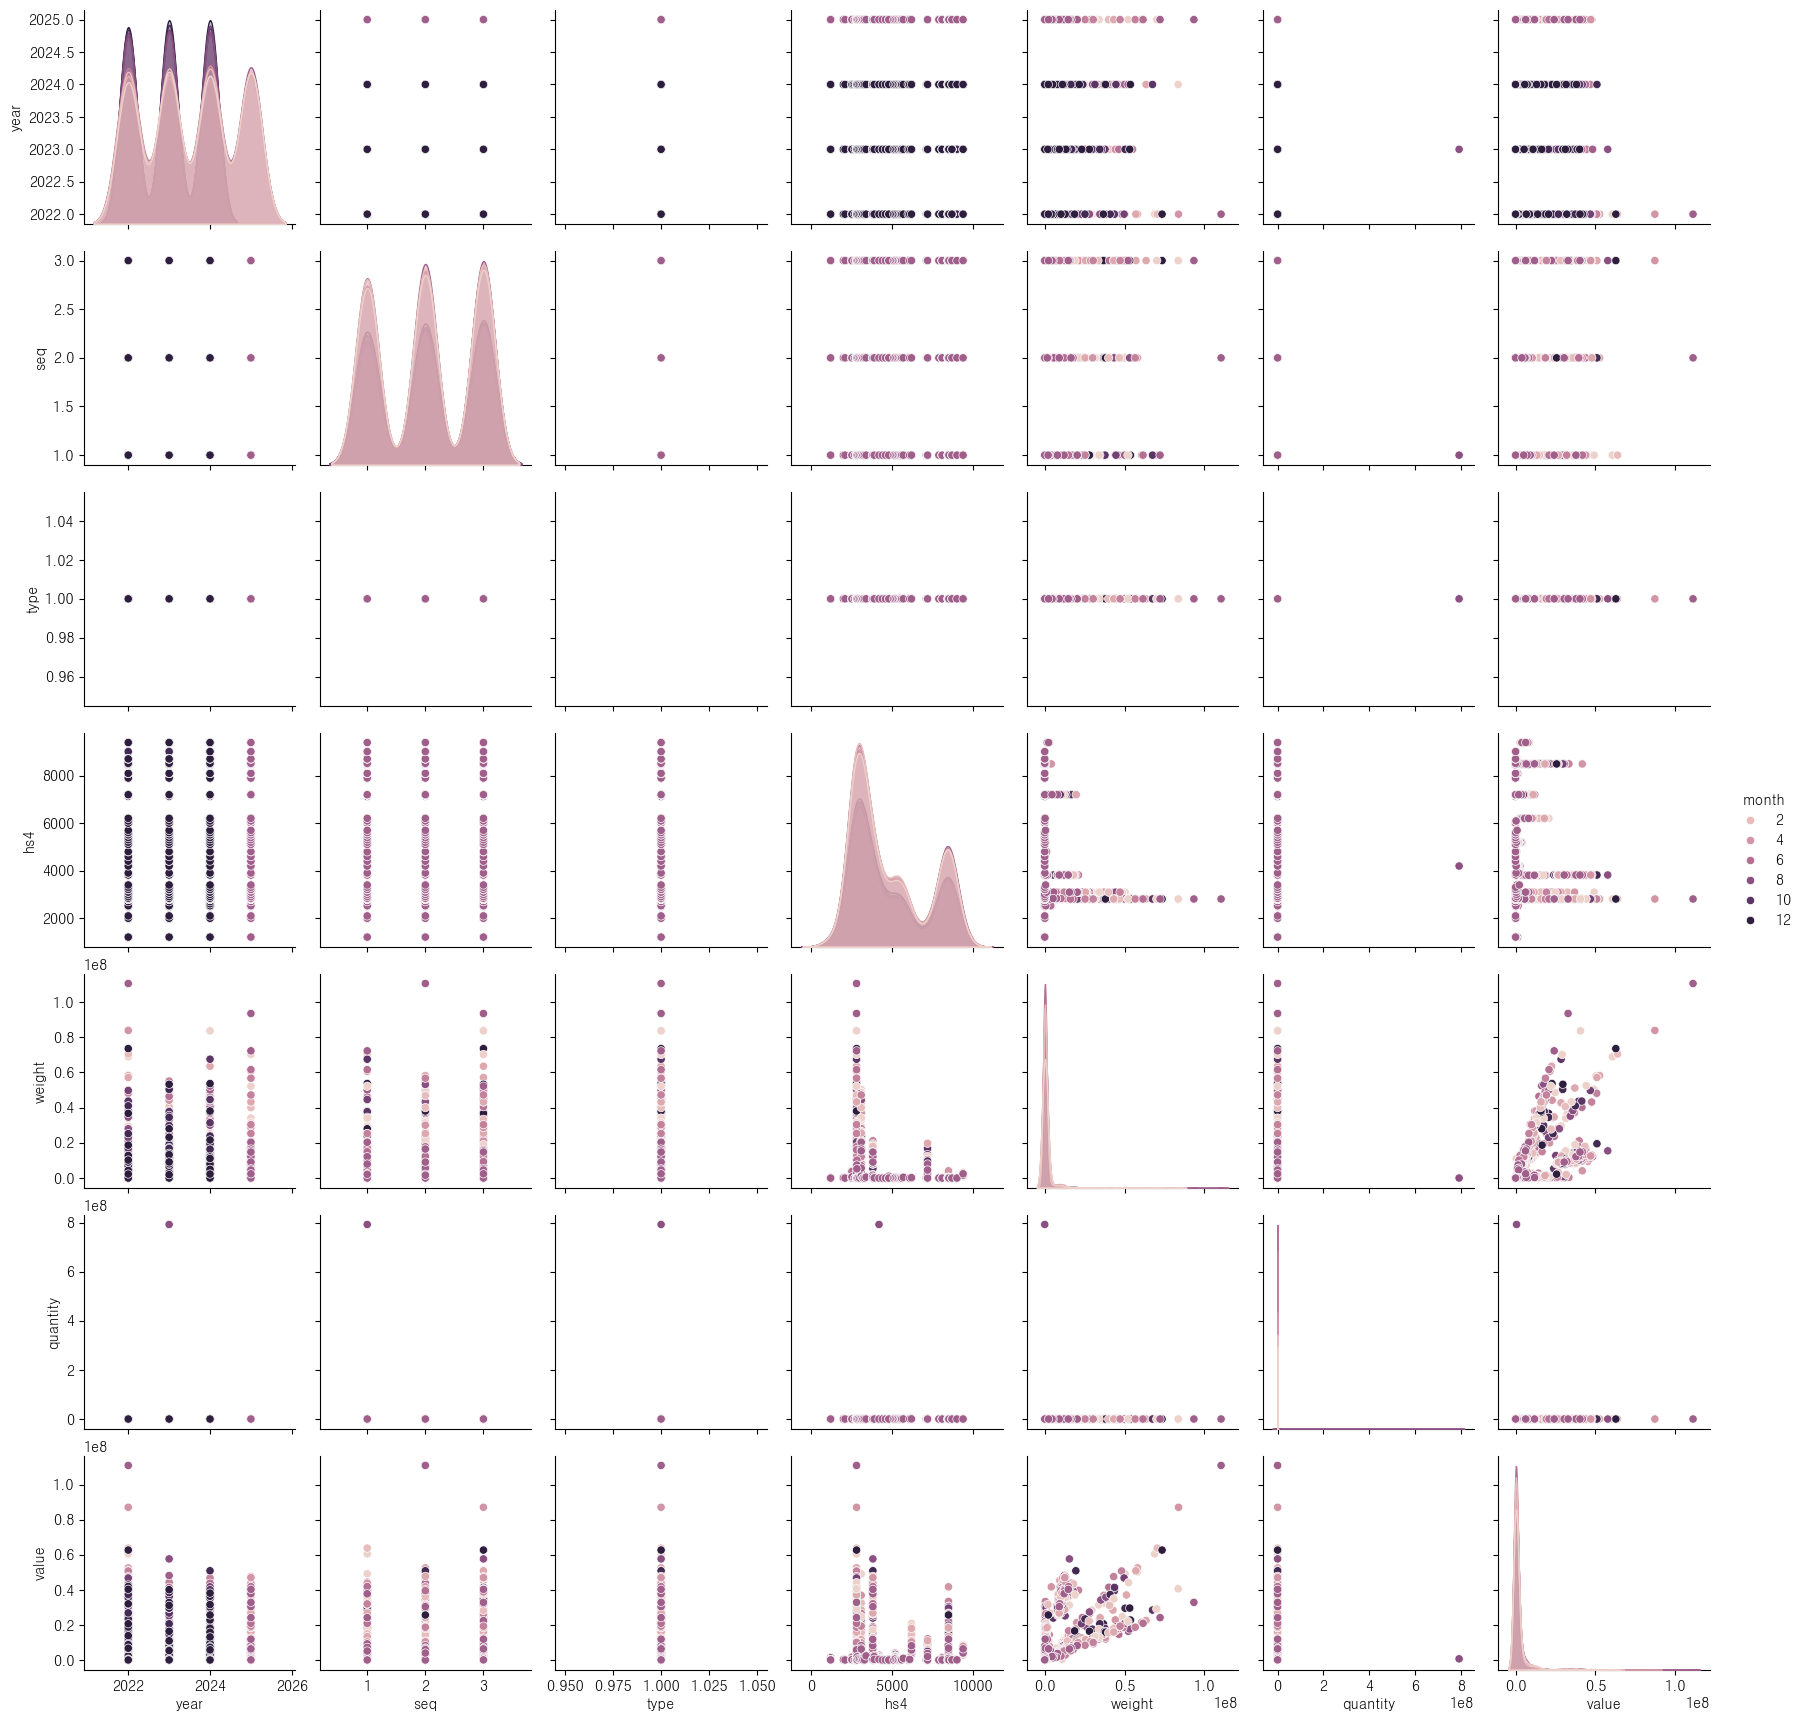

In [ ]:
sns.pairplot(train, hue="month")

In [ ]:
hs4_summary = train.groupby("hs4")["value"].sum().sort_values(ascending=False).head(10)

In [ ]:
summary

item_id     value_sum    value_mean    weight_sum   weight_mean  count
0   AANGBULD  3.612761e+06  6.451359e+04  6.357050e+06  1.135188e+05     56
1   AHMDUILJ  5.453639e+06  4.227627e+04  1.928549e+06  1.494999e+04    129
2   ANWUJOKX  3.503090e+05  1.946161e+04  5.106800e+05  2.837111e+04     18
3   APQGTRMF  1.105995e+07  9.617348e+04  1.992302e+06  1.732437e+04    115
4   ATLDMDBO  2.579887e+09  2.063909e+07  4.396803e+09  3.517442e+07    125
..       ...           ...           ...           ...           ...    ...
95  YSYHGLQK  9.583800e+04  9.779388e+02  6.720000e+02  6.857143e+00     98
96  ZCELVYQU  8.540033e+06  8.133365e+04  5.869210e+05  5.589724e+03    105
97  ZGJXVMNI  9.701974e+07  7.520910e+05  8.378900e+04  6.495271e+02    129
98  ZKENOUDA  7.047435e+06  5.593202e+04  2.097630e+05  1.664786e+03    126
99  ZXERAXWP  4.857890e+05  3.765806e+03  1.297060e+05  1.005473e+03    129

[100 rows x 6 columns]

In [ ]:
train.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

item_id  year  month  seq  type   hs4     weight  quantity      value
0      DEWLVASR  2022      1  1.0     1  3038    14858.0       0.0    32688.0
1      ELQGMQWE  2022      1  1.0     1  2002    62195.0       0.0   110617.0
2      AHMDUILJ  2022      1  1.0     1  2102    18426.0       0.0    72766.0
3      XIPPENFQ  2022      1  1.0     1  2501    20426.0       0.0    11172.0
4      FTSVTTSR  2022      1  1.0     1  2529   248000.0       0.0   143004.0
...         ...   ...    ...  ...   ...   ...        ...       ...        ...
10831  XIFHSOWQ  2025      7  3.0     1  8708      352.0       0.0    12937.0
10832  FITUEHWN  2025      7  3.0     1  8714      655.0     900.0    16054.0
10833  UGEQLMXM  2025      7  3.0     1  8714      758.0       0.0    74377.0
10834  BLANHGYY  2025      7  3.0     1  9022      345.0       2.0    69720.0
10835  BUZIIBYG  2025      7  3.0     1  9403  2415019.0       0.0  6359276.0

[10836 rows x 9 columns]

In [ ]:
unique_hs4 = train["hs4"].dropna().unique()
print(sorted(unique_hs4))

print("고유 hs4 개수:", len(unique_hs4))

[np.int64(1210), np.int64(2002), np.int64(2102), np.int64(2501), np.int64(2529), np.int64(2612), np.int64(2701), np.int64(2710), np.int64(2805), np.int64(2807), np.int64(2811), np.int64(2814), np.int64(2825), np.int64(2833), np.int64(2836), np.int64(2841), np.int64(2846), np.int64(2847), np.int64(2916), np.int64(3003), np.int64(3006), np.int64(3024), np.int64(3038), np.int64(3102), np.int64(3206), np.int64(3207), np.int64(3215), np.int64(3307), np.int64(3404), np.int64(3806), np.int64(3813), np.int64(3815), np.int64(3824), np.int64(3904), np.int64(3909), np.int64(4202), np.int64(4302), np.int64(4403), np.int64(4408), np.int64(4601), np.int64(4802), np.int64(4810), np.int64(5111), np.int64(5119), np.int64(5205), np.int64(5309), np.int64(5402), np.int64(5512), np.int64(5515), np.int64(5602), np.int64(5609), np.int64(5705), np.int64(6006), np.int64(6101), np.int64(6211), np.int64(7142), np.int64(7202), np.int64(7207), np.int64(7907), np.int64(8102), np.int64(8105), np.int64(8461), np.int6